# Housing Price

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
Objective:
The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Importing important packages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [ ]:
pd.set_option("display.max_columns", None)#To display all the columns

In [3]:
#importing the databouse of house price
house=pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis:

In [5]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

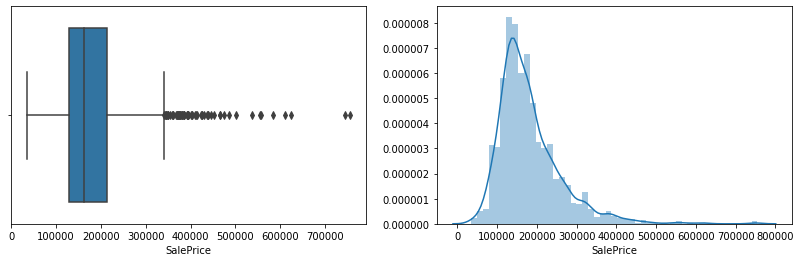

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(house.SalePrice)
plt.subplot(1,2,2)
sns.distplot(house.SalePrice)

SalePrice is Right skewed implicating that there are some outliers towards the higher price. So, we will take natural log to normalize it a bit

In [7]:
house.SalePrice=house.SalePrice.apply(lambda x:math.log(x))

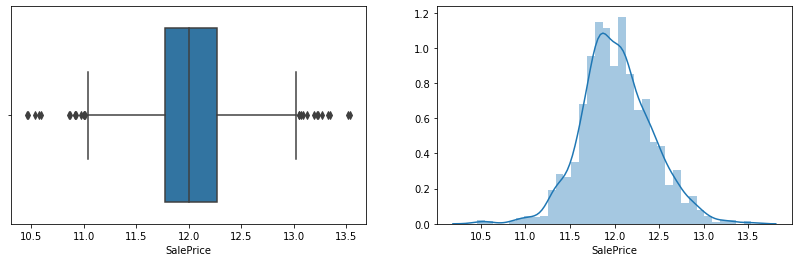

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(house.SalePrice)
plt.subplot(1,2,2)
sns.distplot(house.SalePrice)

### Missing value treatment:

In [9]:
#Checking for no of missing values among various features
house.isnull().sum()[house.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Imputing with'Not available' for the cases where null value is there because feature is not available except in the case of numerical variables and 'Electrical',GarageYrBlt

In [10]:
null_list_cat=['Alley', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']
for feature in null_list_cat:
    house[feature].fillna('Not available',inplace=True)

In [11]:
#Checking for null values again
house.isnull().sum()[house.isnull().sum()!=0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [12]:
house[house.MasVnrArea.isnull()].loc[:,['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,Not available,NaN
529,Not available,NaN
650,Not available,NaN
936,Not available,NaN
973,Not available,NaN
977,Not available,NaN
1243,Not available,NaN
1278,Not available,NaN


In [13]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

NaN in LotFrontage means that there is no street connected to the property so it will be imputed as zero.
Electrical is a categorical variable so it will be imputed with its mode. 
All the MasVnrArea NaN values are because there is no Masonry veneer so it will be also imputed as zero.

In [14]:
house['LotFrontage'].fillna(0,inplace=True)
house['Electrical'].fillna('SBrkr',inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)

In [15]:
#Checking for null values again
house.isnull().sum()[house.isnull().sum()!=0]

GarageYrBlt    81
dtype: int64

In [16]:
house.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [17]:
def YearCat(x):
    if x<1950:
        return ('Before 1950')
    elif x<1975:
        return('1950-1975')
    elif x<2000:
        return('1975-2000')
    elif x<2015:
        return ('After 2000')
    else:
        return ('Not available')

house.GarageYrBlt=house.GarageYrBlt.apply(YearCat)
house.GarageYrBlt.value_counts()

1950-1975        415
After 2000       402
1975-2000        398
Before 1950      164
Not available     81
Name: GarageYrBlt, dtype: int64

In [18]:
#Dropping the variable Id because of insignificance to model
house.drop('Id',axis=1,inplace=True)

MSSubclass is an integer type but it is actually categorial type. Converting the data type 

In [19]:
house.MSSubClass=house.MSSubClass.astype(str)

Feature Creation:

In [20]:
house['Age']=house.YrSold-house.YearBuilt
house['Remod_Age']=house.YrSold-house.YearRemodAdd

In [21]:
house.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [22]:
#function to convert months into different quarters
def MonthCat(x):
    if x<4:
        return ('1st Quarter')
    elif x<7:
        return('2nd Quarter')
    elif x<10:
        return('3rd Quarter')
    else:
        return ('4th Quarter')

house.MoSold=house.MoSold.apply(MonthCat)
house.MoSold.value_counts()

2nd Quarter    598
3rd Quarter    419
4th Quarter    227
1st Quarter    216
Name: MoSold, dtype: int64

In [23]:
#Creating function to analyze numerical variables
def numeric_plot(feature):
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.boxplot(house[feature])
    plt.subplot(1,3,2)
    sns.distplot(house[feature])
    plt.subplot(1,3,3)
    sns.scatterplot(data=house,x=feature,y='SalePrice')
    plt.show()
#Creating function to analyze categorica variables
def cat_mod(feature):
    global house
    #Finding percentage of single valued columns
    ModePer = len(house[house[feature]==house[feature].mode()[0]])*100/len(house[feature])
    #Eliminating columns with more than 95% same value
    if ModePer>95:
        print('Mode percentage of',feature,'is:',ModePer)
        house.drop([feature],axis=1,inplace=True)
    #house[feature].value_counts().plot.bar()
    #plt.show()

In [24]:
house.select_dtypes(include=['object']).columns#filtering datatypes with categorical data

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
house.select_dtypes(exclude=['object']).columns#featuring data types with numeric data

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Age', 'Remod_Age'],
      dtype='object')

In [26]:
#Selection relevant categorical features from both object and non-object data types
cat_list=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageCars',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','OverallQual', 'OverallCond',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MiscVal', 'MoSold' ]

In [27]:
#Callinf=g function to eliminate features having more than 95% same value
for feature in cat_list:
    cat_mod(feature)

Mode percentage of Street is: 99.58904109589041
Mode percentage of Utilities is: 99.93150684931507
Mode percentage of Condition2 is: 98.97260273972603
Mode percentage of RoofMatl is: 98.21917808219177
Mode percentage of Heating is: 97.8082191780822
Mode percentage of PoolQC is: 99.52054794520548
Mode percentage of MiscFeature is: 96.3013698630137
Mode percentage of KitchenAbvGr is: 95.34246575342466
Mode percentage of MiscVal is: 96.43835616438356


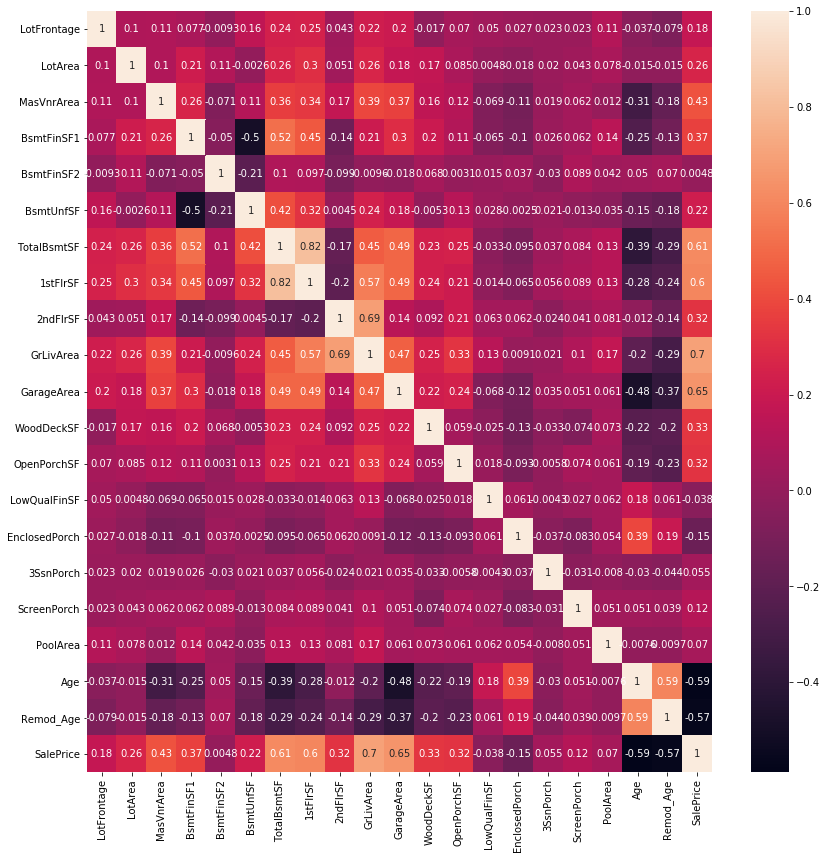

In [28]:
#Plotting heatmap to analyze correlation between numeric variables
df=house[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',  'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF','LowQualFinSF','EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea','Age', 'Remod_Age','SalePrice']].corr()
plt.figure(figsize=(14,14))
sns.heatmap(df,annot=True)

There is not much high multicollinearity among the variables

Analyzing variables with very less correalion with the target variable

In [29]:
house.BsmtFinSF2.describe([0.8,0.9,1.0])

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
50%         0.000000
80%         0.000000
90%       117.200000
100%     1474.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [30]:
house.LowQualFinSF.describe([0.8,0.9,0.95,1.0])

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
50%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
100%      572.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

In [31]:
house.EnclosedPorch.describe([0.8,0.9,0.95,1.0])

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
50%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
100%      552.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

In [32]:
house['3SsnPorch'].describe([0.9,0.95,1.0])

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
50%         0.000000
90%         0.000000
95%         0.000000
100%      508.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [33]:
house['ScreenPorch'].describe([0.9,0.95,1.0])

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
50%         0.000000
90%         0.000000
95%       160.000000
100%      480.000000
max       480.000000
Name: ScreenPorch, dtype: float64

In [34]:
house['PoolArea'].describe([0.95,1.0])

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
50%         0.000000
95%         0.000000
100%      738.000000
max       738.000000
Name: PoolArea, dtype: float64

Among the numeriacal variables like BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SnPorch,ScreenPorch,PoolArea has either very less correlation with sales price or most of the values are zero or outliers as shown above. We can drop columns with very low correlation and analyze rest of the numeric variables

In [35]:
house.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch','PoolArea'],axis=1,inplace=True)

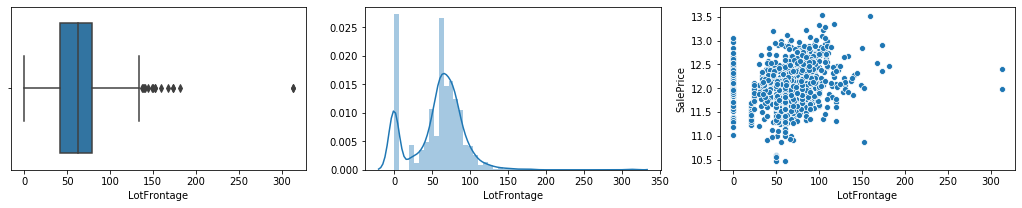

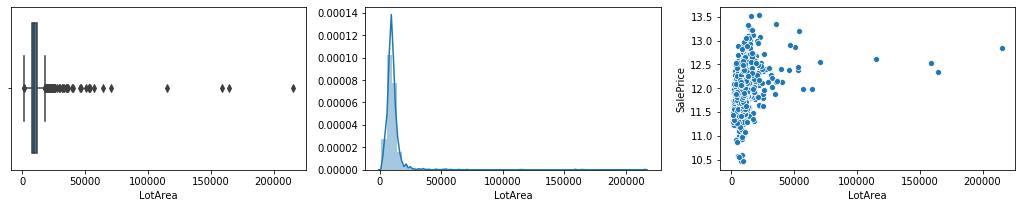

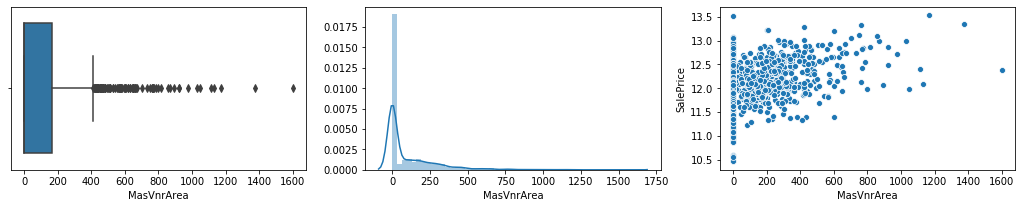

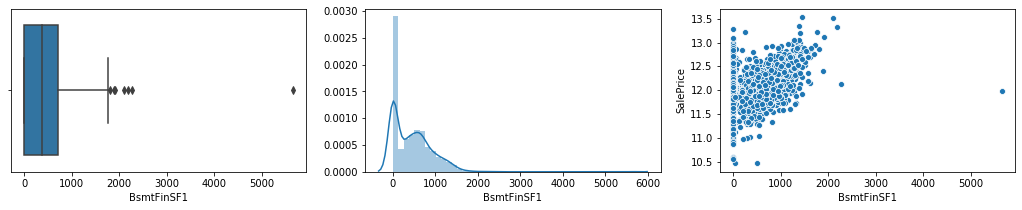

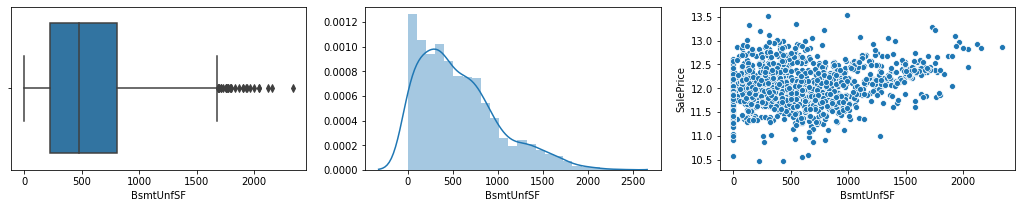

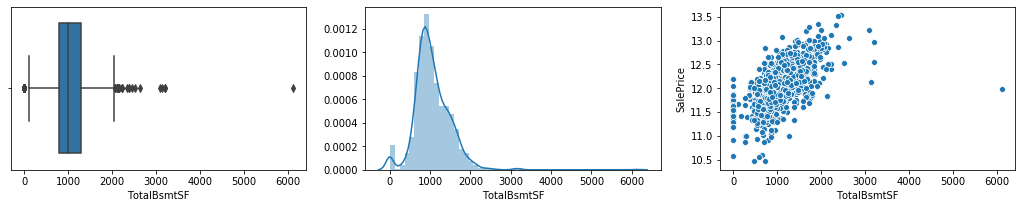

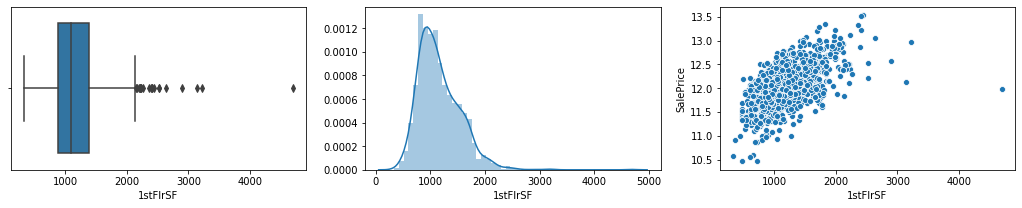

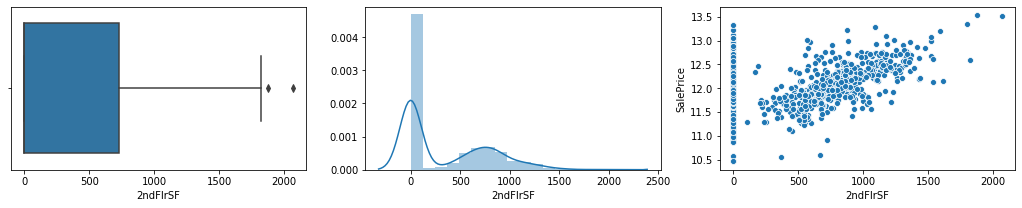

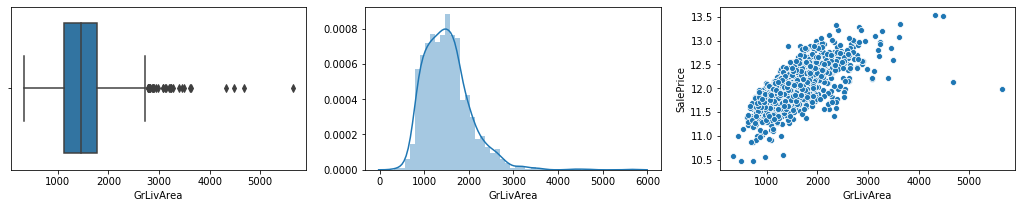

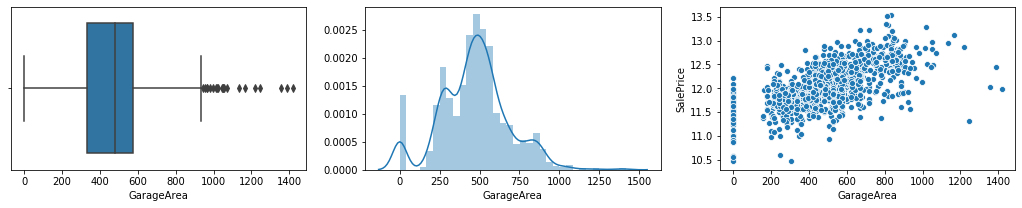

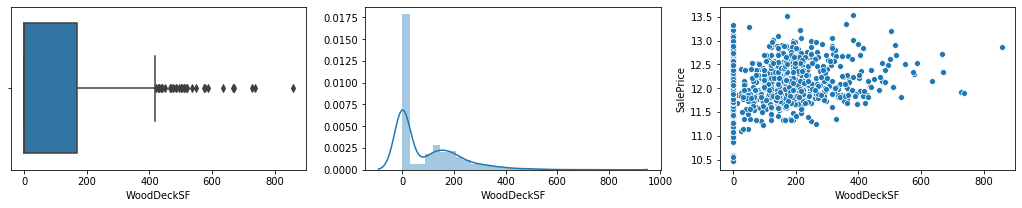

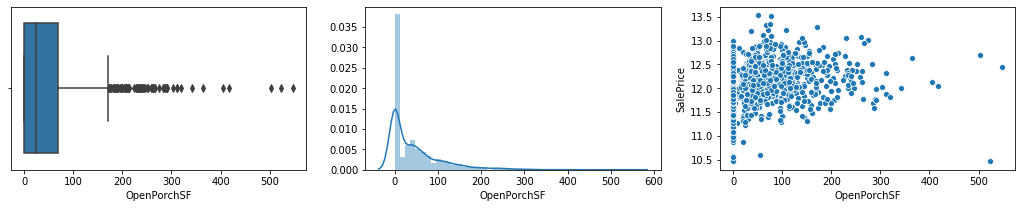

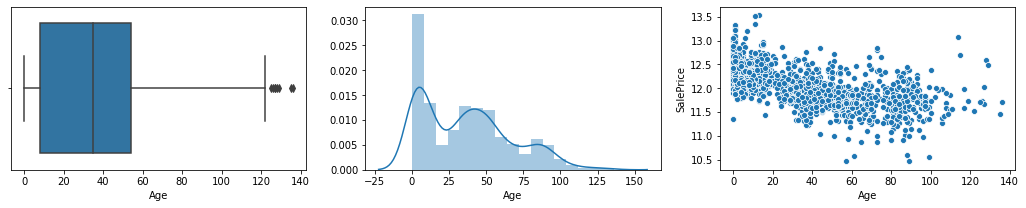

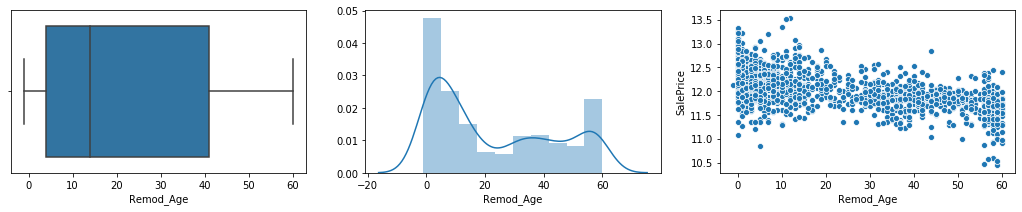

In [36]:
#Analyzing the numeric feature distribution and their correlation with target variable
num_list=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',  'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF','Age', 'Remod_Age' ]
for feature in num_list:
    numeric_plot(feature)

Most of the variables seems to have a relation(increasing/decresing) with the sale price
There are outliers in most of the variables which will be taken care of upto some extent after scaling before modelling. 

In [37]:
house.shape

(1460, 66)

There are 65 relevant features remaining

Creating dummy variables for Categorical datatype

In [38]:
#function to create dummy variables
def dummy(col):
    global house
    for i in col:
        x=pd.get_dummies(house[i],drop_first=True,prefix=i,prefix_sep='_')
        house=pd.concat([house,x],axis=1)
        house.drop([i],axis=1,inplace=True)
col=house.select_dtypes(include=['object']).columns
dummy(col)

In [39]:
house.shape

(1460, 244)

There are 243 variables after creating dummy variables

In [40]:
house.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,Age,Remod_Age,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Not available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not available,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not available,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not available,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not available,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not available,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not available,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not available,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageYrBlt_1975-2000,GarageYrBlt_After 2000,GarageYrBlt_Before 1950,GarageYrBlt_Not available,GarageFinish_Not available,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not available,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not available,MoSold_2nd Quarter,MoSold_3rd Quarter,MoSold_4th Quarter,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Norma

In [41]:
#Splitting dataset into x and y for modelling
y = house.pop('SalePrice')
X = house

In [42]:
#Scaling using MinMax Scaler
cols=X.columns
scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.columns=cols

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

In [43]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Age,Remod_Age,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Not available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not available,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not available,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not available,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not available,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not available,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not available,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not available,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageYrBlt_1975-2000,GarageYrBlt_After 2000,GarageYrBlt_Before 1950,GarageYrBlt_Not available,GarageFinish_Not available,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not available,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not available,MoSold_2nd Quarter,MoSold_3rd Quarter,MoSold_4th Quarter,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCond

All variables are well scaled.


We will first perform linear regression with all the variables and see how all the variables fit

### Linear Regression:

In [44]:
# Performing linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predicting on training dataset
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.9256885461038401
Test score: -1.3187368513349293e+22


We can see that the training set has good score but test set has a very bad score which clearly means that model is overfitting and performing very badly. Next we will use RFE for 40 features to select important feature and then perform Lasso and Ridge to generalize the model

In [45]:
#Recurrsive feature elimination
rfe=RFE(lm,40)
rfe=rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]

In [46]:
#transforming X with set of features from RFE
X_train=X_train[col]
X_test=X_test[col]
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,GrLivArea,BsmtFullBath,FullBath,GarageCars,ScreenPorch,Age,MSSubClass_20,MSSubClass_40,MSSubClass_75,MSSubClass_80,LotShape_IR3,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior2nd_CBlock,Exterior2nd_Other,BsmtQual_Not available,BsmtCond_Not available,BsmtFinType1_Not available,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageFinish_Not available,SaleType_Con,SaleType_Oth,SaleCondition_AdjLand
632,0.271565,0.049545,0.666667,0.500,0.202901,0.000000,0.666667,0.5,0.000000,0.235294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.000000,0.061062,0.666667,0.500,0.325546,0.333333,0.666667,0.5,0.320833,0.139706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.255591,0.035486,0.444444,0.500,0.137717,0.000000,0.333333,0.5,0.000000,0.345588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1174,0.255591,0.071327,0.555556,0.875,0.378862,0.000000,0.666667,0.5,0.000000,0.544118,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
250,0.175719,0.018930,0.222222,0.125,0.183120,0.000000,0.333333,0.0,0.000000,0.514706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Lasso:

In [47]:
# cross validation parameters 
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# setting the range of alpha
params = {'alpha': [0.0001,0.001, 0.01, 1.0,10.0,100.0,1000.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'r2', cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0,
                                   1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [48]:
#Cross validation result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015791,0.005910,0.004997,0.004513,0.0001,{'alpha': 0.0001},0.713381,0.887415,0.863364,0.868648,0.896487,0.845859,0.067329,2,0.913930,0.881056,0.882013,0.879679,0.878267,0.886989,0.013530
1,0.002011,0.002538,0.003724,0.006062,0.001,{'alpha': 0.001},0.726998,0.874820,0.858062,0.908625,0.889959,0.851693,0.064544,1,0.901706,0.863948,0.870993,0.860266,0.861786,0.871740,0.015427
2,0.010904,0.006888,0.003798,0.002637,0.01,{'alpha': 0.01},0.668253,0.682929,0.684460,0.768454,0.742676,0.709354,0.039014,3,0.735317,0.716819,0.720639,0.704406,0.709799,0.717396,0.010569
3,0.005597,0.003135,0.002599,0.001624,1,{'alpha': 1.0},-0.010056,-0.000026,-0.011735,-0.005145,-0.004279,-0.006248,0.004205,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009374,0.007654,0.003125,0.006250,10,{'alpha': 10.0},-0.010056,-0.000026,-0.011735,-0.005145,-0.004279,-0.006248,0.004205,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


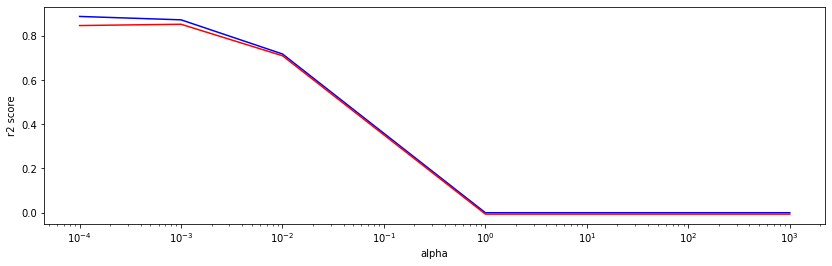

In [49]:
#Plotting test and train score with varying alpha
plt.figure(figsize=(14,4))
sns.lineplot(data=cv_results,x='param_alpha',y='mean_train_score',color='blue')
sns.lineplot(data=cv_results,x='param_alpha',y='mean_test_score',color='red')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [50]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)
#Prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.8687351410362536
Test score: 0.8660834176940811


Train and test score is almost similar so this is a good fit

In [51]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff=list(zip(cols, model_parameters))
coeff=sorted(coeff,key=lambda x:abs(x[1]),reverse=True)[:10]#sorted coefficients to find most significant features
coeff

[('constant', 10.957),
 ('GrLivArea', 1.146),
 ('OverallQual', 0.726),
 ('Age', -0.355),
 ('GarageCars', 0.352),
 ('OverallCond', 0.296),
 ('BsmtFullBath', 0.201),
 ('Neighborhood_Crawfor', 0.176),
 ('FullBath', 0.163),
 ('BldgType_Twnhs', -0.152)]

In [52]:
for i in coeff:
    if i[1]!=0:
        print(i[0],end=', ')

constant, GrLivArea, OverallQual, Age, GarageCars, OverallCond, BsmtFullBath, Neighborhood_Crawfor, FullBath, BldgType_Twnhs, 

After Lasso, the significant features are as shown above. It is evident that lasso has brought many of the coefficient to 0 which are insignificant.

Among this top 5 significant features are GrLivArea, OverallQual, Age, GarageCars, OverallCond

### Ridge:

In [53]:
# cross validation parameters 
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# setting the range of alpha
params = {'alpha': [0.0001,0.001, 0.01,0.05,0.1,0.5, 1.0,10.0,100.0,1000.0]}

# grid search
# Ridge model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003125,0.006250,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.711711,0.885658,0.866118,0.859544,0.896348,0.843876,0.067390,7,0.914240,0.882094,0.882836,0.880590,0.878999,0.887752,0.013310
1,0.012566,0.003476,0.001399,0.001199,0.001,{'alpha': 0.001},0.711770,0.885657,0.866112,0.859623,0.896345,0.843901,0.067369,6,0.914240,0.882094,0.882836,0.880590,0.878999,0.887752,0.013310
2,0.006396,0.000491,0.002352,0.000534,0.01,{'alpha': 0.01},0.712354,0.885644,0.866044,0.860400,0.896319,0.844152,0.067167,5,0.914239,0.882093,0.882835,0.880588,0.878997,0.887750,0.013310
3,0.003798,0.003122,0.004796,0.004870,0.05,{'alpha': 0.05},0.714875,0.885522,0.865745,0.863652,0.896178,0.845194,0.066290,4,0.914208,0.882061,0.882817,0.880547,0.878969,0.887721,0.013309
4,0.007996,0.001547,0.002999,0.000632,0.1,{'alpha': 0.1},0.717852,0.885261,0.865373,0.867303,0.895959,0.846350,0.065250,3,0.914117,0.881976,0.882767,0.880432,0.878890,0.887636,0.013307


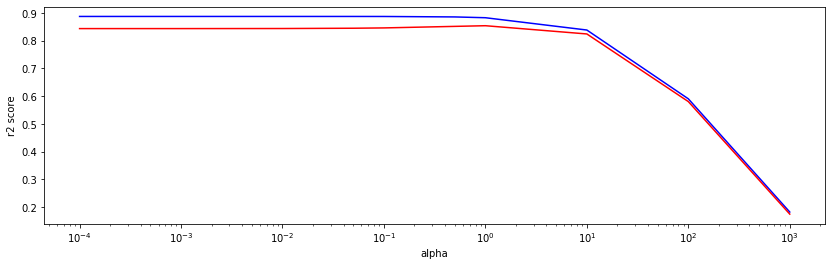

In [55]:
#Plotting test and train score with varying alpha
plt.figure(figsize=(14,4))
sns.lineplot(data=cv_results,x='param_alpha',y='mean_train_score',color='blue')
sns.lineplot(data=cv_results,x='param_alpha',y='mean_test_score',color='red')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [56]:
# model with optimal alpha
# ridge regression
lm = Ridge(alpha=1.0)
lm.fit(X_train, y_train)
#Prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.8809723717839089
Test score: 0.8585868900738577


In [57]:
# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff=list(zip(cols, model_parameters))
coeff=sorted(coeff,key=lambda x:abs(x[1]),reverse=True)[:10]#sorted coefficients to find most significant features
coeff

[('constant', 10.925),
 ('GrLivArea', 1.016),
 ('OverallQual', 0.678),
 ('LotArea', 0.402),
 ('Age', -0.391),
 ('GarageCars', 0.355),
 ('Exterior1st_BrkComm', -0.32),
 ('OverallCond', 0.313),
 ('FullBath', 0.223),
 ('BsmtFullBath', 0.217)]

In [58]:
for i in coeff:
    if i[1]!=0:
        print(i[0],end=', ')

constant, GrLivArea, OverallQual, LotArea, Age, GarageCars, Exterior1st_BrkComm, OverallCond, FullBath, BsmtFullBath, 

After Ridge, the significant features are as shown above. Ridge cannot reduce the coefficients to zero and hence not helpful for feature elemination

Among this top 5 significant features are GrLivArea, OverallQual, LotArea, Age, GarageCars.

### If alpha is doubled

In [59]:
# model with double alpha
# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)
#Prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.8557557549372371
Test score: 0.8564837928296649


In [60]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff=list(zip(cols, model_parameters))
coeff=sorted(coeff,key=lambda x:abs(x[1]),reverse=True)[:10]#sorted coefficients to find most significant features
coeff

[('constant', 10.957),
 ('GrLivArea', 1.038),
 ('OverallQual', 0.792),
 ('GarageCars', 0.368),
 ('Age', -0.283),
 ('OverallCond', 0.227),
 ('BsmtFullBath', 0.181),
 ('Neighborhood_Crawfor', 0.154),
 ('FullBath', 0.153),
 ('Neighborhood_NridgHt', 0.116)]

In [61]:
# model with double alpha
# ridge regression
lm = Ridge(alpha=0.2)
lm.fit(X_train, y_train)
#Prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.8839846517283221
Test score: 0.861409242037389


In [62]:
# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff=list(zip(cols, model_parameters))
coeff=sorted(coeff,key=lambda x:abs(x[1]),reverse=True)[:10]#sorted coefficients to find most significant features
coeff

[('constant', 10.882),
 ('GrLivArea', 1.184),
 ('OverallQual', 0.663),
 ('Exterior1st_BrkComm', -0.531),
 ('LotArea', 0.526),
 ('Age', -0.425),
 ('GarageCars', 0.341),
 ('OverallCond', 0.327),
 ('Functional_Sev', -0.317),
 ('Neighborhood_StoneBr', 0.221)]

### After removing top 5 feature of lasso 

There might be a little collinearity of current top 5 features with previous features that would have been remod during RFE.
After removing the 5 features we will start again from RFE to know the next best 5 feature

In [63]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Age,Remod_Age,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Not available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not available,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not available,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not available,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not available,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not available,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not available,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not available,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageYrBlt_1975-2000,GarageYrBlt_After 2000,GarageYrBlt_Before 1950,GarageYrBlt_Not available,GarageFinish_Not available,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not available,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not available,MoSold_2nd Quarter,MoSold_3rd Quarter,MoSold_4th Quarter,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCond

In [64]:
#Dropping the top 5 features
X_train.drop(['GrLivArea', 'OverallQual', 'Age', 'GarageCars', 'OverallCond'],axis=1,inplace=True)
X_test.drop(['GrLivArea', 'OverallQual', 'Age', 'GarageCars', 'OverallCond'],axis=1,inplace=True)
X_train.head()

C:\Users\Kishan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Remod_Age,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Not available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not available,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not available,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not available,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not available,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not available,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not available,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not available,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageYrBlt_1975-2000,GarageYrBlt_After 2000,GarageYrBlt_Before 1950,GarageYrBlt_Not available,GarageFinish_Not available,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not available,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not available,MoSold_2nd Quarter,MoSold_3rd Quarter,MoSold_4th Quarter,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,0.271565,0.049545,0.130625,0.14

In [65]:
# Performing linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predicting on training dataset
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.9228632796891407
Test score: -1.7082472696638508e+18


In [66]:
rfe=RFE(lm,40)
rfe=rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]

In [67]:
#transforming X with set of features from RFE
X_train=X_train[col]
X_test=X_test[col]
X_train.head()

,LotArea,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,ScreenPorch,Remod_Age,MSSubClass_30,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_RRNn,BldgType_2fmCon,BldgType_Twnhs,Exterior1st_BrkComm,Exterior2nd_CBlock,ExterCond_Po,BsmtQual_Not available,BsmtCond_Not available,BsmtCond_Po,Electrical_FuseP,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Not available,GarageYrBlt_Not available,GarageFinish_Not available,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,SaleType_Con
632,0.049545,0.247132,0.000000,0.000000,0.666667,0.383639,0.000000,0.540984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208,0.061062,0.194126,0.427119,0.333333,0.666667,0.320169,0.320833,0.311475,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83,0.035486,0.167737,0.000000,0.000000,0.333333,0.325106,0.000000,0.786885,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1174,0.071327,0.191831,0.569007,0.000000,0.666667,0.253879,0.000000,0.934426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
250,0.018930,0.223038,0.000000,0.000000,0.333333,0.000000,0.000000,0.737705,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
# cross validation parameters 
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# setting the range of alpha
params = {'alpha': [0.0001,0.001, 0.01, 1.0,10.0,100.0,1000.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'r2', cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0,
                                   1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [69]:
#Cross validation result
cv_results = pd.DataFrame(model_cv.cv_results_)

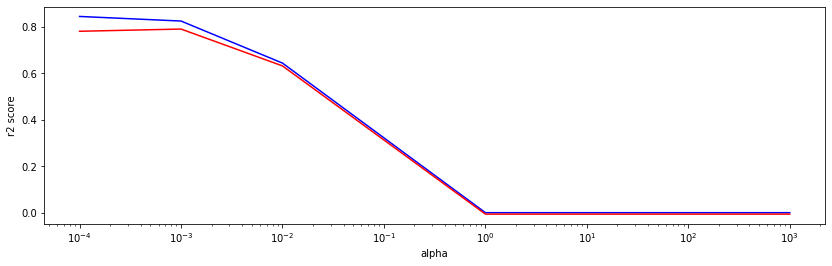

In [70]:
#Plotting test and train score with varying alpha
plt.figure(figsize=(14,4))
sns.lineplot(data=cv_results,x='param_alpha',y='mean_train_score',color='blue')
sns.lineplot(data=cv_results,x='param_alpha',y='mean_test_score',color='red')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [71]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)
#Prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Training score:',metrics.r2_score(y_train, y_train_pred))
print('Test score:',metrics.r2_score(y_test, y_test_pred))

Training score: 0.818974763106284
Test score: 0.8021856085868804


Train and test score is almost similar so this is a good fit. It is not overfit but R squared is less.

In [72]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff=list(zip(cols, model_parameters))
coeff=sorted(coeff,key=lambda x:abs(x[1]),reverse=True)[:6]#sorted coefficients to find most significant features

In [73]:
for i in coeff:
    if i[1]!=0:
        print(i[0],end=', ')

constant, 1stFlrSF, 2ndFlrSF, GarageArea, FullBath, Remod_Age, 

After removing the top 5 variable, next 5 predictor variable are 1stFlrSF, 2ndFlrSF, GarageArea, FullBath, Remod_Age